## Intro to sympy: 
+  variables
+  differentiation 
+  integration
+  evaluation of symbolic expressions

In [2]:
import sympy as sym
sym.init_printing() # for LaTeX formatted output

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))        # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)         # Adjusts supblot parameters for new size

NOTES
- Sympy functions, and variables, and even floats aren't the same as numpy/scipy/python analogues.  For example
    + sym.exp != sp.exp

- Sympy has some math functions included, but not full numpy/scipy, as demonstrated in the following cells.

- Symbols that are going to used as symbolic variable must be declared as such.  This is different than in <em>Mathematica</em>. 

- One consequence is that sympy symbolic expressions must be turned into scipy/numpy/python expressions if they are to be evaluated for plotting or numerical results.  This is done with the `lambdify` command.

- In fall 2019 we're using `sympy<` 1.4. Documentation and tutorial can be found at http://docs.sympy.org/latest/

- ML's conclusion as of 9/17/16: Don't mix `sympy` and `scipy/numpy`.  Do symbolic work with `sympy`, and then switch by "lambdifying" symbolic exressions, turning them into python functions. 

- `sympy` does have it's own plotting capabilities for symbolic expressions (matplotlib is a back-end).  ML hasn't explored this very deeply; so far just using matplotlib on "lambdified" expressions.  

### Symbolic variables

Given the way I imported things, the following cell doesn't work.

In [4]:
exp(3.)

NameError: name 'exp' is not defined

This does work.

In [5]:
sym.exp(3.)

And, as in <em>Mathematica</em>, the output of  the following cell will be symbolic.

In [6]:
sym.exp(3)

The analogue of <em>Mathematica</em>'s `Exp[3]//N`, or `N[Exp[3]]`, is

In [7]:
sym.exp(3).evalf()  

The analogue of <em>Mathematica</em>'s "slash-dot using" syntax `Exp[x]/.x->3` is

In [8]:
sym.exp(x).subs({x:3})

NameError: name 'x' is not defined

Oops! This is an example of not having declared `x` to be a symbolic variable.  Let's try again.

In sympy, variables that are going to be used as algebraic symbols must be declared as such.  Here's an example of a simple declaration:

In [9]:
x = sym.symbols('x')
sym.exp(x).subs({x:3.})

In [10]:
type(x)

sympy.core.symbol.Symbol

You can control, to some degree, assumptions about the symbolic variables.  (As of sympy 1.0, this is still a work in progress for sophisticated assumptions.)

In [11]:
y = sym.symbols('y',negative=True)
(4 - y).is_positive

True

The variable name used in python code, and the output representation do not have be the same.  Here's
a built-in example:

In [12]:
sym.pi, sym.E

In [13]:
sym.pi.evalf(), sym.E.evalf()

Sympy knows how to convert some standard variables to LaTeX output:

In [14]:
Sigma = sym.symbols('Sigma')
Sigma

But you can be more creative:

In [15]:
sigma, sigma_p = sym.symbols('Sigma, \Sigma^{\prime}')
sigma, sigma_p

There are other shorter ways to declare symbolic variables, but you lose some of the flexibility demonstrated above. You can import directly from a set of common symbols in the 
following way:
- `from sympy.abc import w`

### Integration

Now let's evaluate the following integral:

$$ \int\left[\sin(x y) + \cos(y z)\right]\, dx  $$

In [16]:
x,y,z = sym.symbols('x,y,z')

In [17]:
f = sym.sin(x*y) + sym.cos(y*z)  # scipy trig functions won't work!

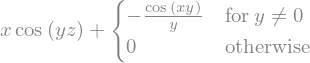

In [18]:
sym.integrate(f,x)

Now let's make it a definite integral:

$$ \int_{-1}^1\left[\sin(x y) + \cos(y z)\right]\, dx  $$

In [19]:
sym.integrate(f,(x,-1,1))

And now a 2-d integral with infinity as a limit:

$$ \int_{-\infty}^\infty\int_{-\infty}^\infty e^{-x^2-y^2}\, dxdy $$

In [20]:
sym.integrate(sym.exp(-x**2 - y**2), \
              (x, -sym.oo, sym.oo), (y, -sym.oo, sym.oo))

### Differentiation

In [21]:
x,y,z = sym.symbols('x,y,z')

In [22]:
g = sym.cos(x)**2

In [23]:
sym.diff(g,x)     # First derivative (or sym.diff(g,x,1))

In [24]:
sym.diff(g,x,2)   # Higher order derivative (or sym.diff(g,x,x))

Evaluate 
$$\frac{\partial^3}{\partial^2x\partial y} e^{xyz}$$

In [25]:
h = sym.exp(x*y*z)
sym.diff(h,x,x,y)

In [26]:
def m(x):
    return 3*x**4

In [27]:
sym.diff(m(x),x)

### Evaluating sympy expressions numerically

In [28]:
x,y,z = sym.symbols('x,y,z')

#### Evaluation at a single point

In [29]:
a = 12*x**3

In [30]:
a.subs(x,2)  # or a.sub({x:2}). In general, the argument is a dictionary

In [31]:
b = a*sym.exp(y)
b

In [32]:
b.subs(x,2)

In [33]:
b.subs({x:2,y:sym.log(1/2)})

### Turn `sympy` expression into a python function for subsequent use

In [34]:
f = sym.lambdify(x,a)         # Creates a python function f(x)
g = sym.lambdify((x,y),b)     # Creates a python function g(x,y)

<IPython.core.display.Javascript object>


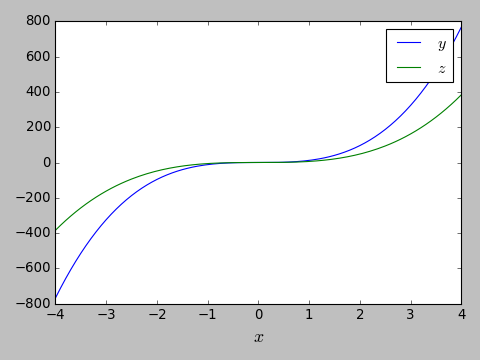

In [38]:
xx = np.linspace(-4,4,161) # xx so that it doesn't collide with symbolic x
y = f(xx)
z = g(xx,np.log(1/2))
plt.figure()
plt.plot(xx,y, label='$y$')
plt.plot(xx,z, label='$z$')
plt.xlabel('$x$')
plt.legend();

#### Version Information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [39]:
%load_ext version_information

In [40]:
version_information numpy, matplotlib, sympy

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.7.1908 Core
numpy 1.18.5
matplotlib 3.3.0
sympy 1.6.1
Fri Aug 07 15:48:46 2020 EDT